# Heart Disease Prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

**1.Data Cleaning**

1.   Taking care of Missing values
2.   Taking care of Duplicate Values



Taking care of Missing values

In [4]:
data.isnull()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False  False  False   False  

[303 rows x 14 columns]

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Taking care of Duplicate Values

In [6]:
data.duplicated().any()

True

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().any()

False

**2. Data Processing**

1. Encoding Categorical Data
2. Feature Scaling



In [9]:
cate_val = []
num_val = []

for column in data.columns:
  if data[column].nunique() <= 10:
    cate_val.append(column)
  else:
    num_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding Categorical Data



In [12]:
cate_val.remove('sex')

cate_val.remove('target')

In [13]:
data = pd.get_dummies(data, columns=cate_val, drop_first=True)

In [14]:
data

age  sex  trestbps  chol  thalach  oldpeak  target  cp_1  cp_2  cp_3  \
0     63    1       145   233      150      2.3       1     0     0     1   
1     37    1       130   250      187      3.5       1     0     1     0   
2     41    0       130   204      172      1.4       1     1     0     0   
3     56    1       120   236      178      0.8       1     1     0     0   
4     57    0       120   354      163      0.6       1     0     0     0   
..   ...  ...       ...   ...      ...      ...     ...   ...   ...   ...   
298   57    0       140   241      123      0.2       0     0     0     0   
299   45    1       110   264      132      1.2       0     0     0     1   
300   68    1       144   193      141      3.4       0     0     0     0   
301   57    1       130   131      115      1.2       0     0     0     0   
302   57    0       130   236      174      0.0       0     1     0     0   

     ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
0    ...        0        0        0     0     0     0     0       1       0   
1    ...        0        0        0     0     0     0     0       0       1   
2    ...        0        0        1     0     0     0     0       0       1   
3    ...        0        0        1     0     0     0     0       0       1   
4    ...        1        0        1     0     0     0     0       0       1   
..   ...      ...      ...      ...   ...   ...   ...   ...     ...     ...   
298  ...        1        1        0     0     0     0     0       0       0   
299  ...        0        1        0     0     0     0     0       0       0   
300  ...        0        1        0     0     1     0     0       0       0   
301  ...        1        1        0     1     0     0     0       0       0   
302  ...        0        1        0     1     0     0     0       0       1   

     thal_3  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
298       1  
299       1  
300       1  
301       1  
302       0  

[302 rows x 23 columns]

Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

data[num_val] = st.fit_transform(data[num_val])

In [16]:
data.head()

age  sex  trestbps      chol   thalach   oldpeak  target  cp_1  cp_2  \
0  0.949794    1  0.764066 -0.261285  0.018826  1.084022       1     0     0   
1 -1.928548    1 -0.091401  0.067741  1.636979  2.118926       1     0     1   
2 -1.485726    0 -0.091401 -0.822564  0.980971  0.307844       1     1     0   
3  0.174856    1 -0.661712 -0.203222  1.243374 -0.209608       1     1     0   
4  0.285561    0 -0.661712  2.080602  0.587366 -0.382092       1     0     0   

   cp_3  ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  \
0     1  ...        0        0        0     0     0     0     0       1   
1     0  ...        0        0        0     0     0     0     0       0   
2     0  ...        0        0        1     0     0     0     0       0   
3     0  ...        0        0        1     0     0     0     0       0   
4     0  ...        1        0        1     0     0     0     0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 23 columns]

3. Splitting Dataset into Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split

x = data.drop('target',axis=1)

y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Machine Learning Models**

*   Linear Machine Learning Models

1.   Logistic Regression
2.   Support Vector Classifier
3.   KNeighbors Classifier


*   Non Linear Machine Learning Models

1.   Decision Tree Classifier
1.   Random Forest Classifier

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred1 = log.predict(x_test)

accuracy_score(y_test, y_pred1)

0.9016393442622951

Support Vector Classifier

In [19]:
from sklearn import svm

svm = svm.SVC()

svm.fit(x_train, y_train)

y_pred2 = svm.predict(x_test)

accuracy_score(y_test, y_pred2)

0.8688524590163934

KNeighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)

0.8688524590163934

In [21]:
score = []

for k in range(1, 40) :

  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train, y_train)

  y_pred = knn.predict(x_test)

  score.append(accuracy_score(y_test, y_pred))

In [22]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [23]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train, y_train)

y_pred3 = knn.predict(x_test)

accuracy_score(y_test, y_pred3)

0.8688524590163934

Non Linear Machine Learning

In [24]:
data = pd.read_csv('heart.csv')

data = data.drop_duplicates()

x = data.drop('target', axis=1)

y = data['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred4 = dt.predict(x_test)

accuracy_score(y_test, y_pred4)

0.7704918032786885

Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred5 = rf.predict(x_test)

accuracy_score(y_test, y_pred5)

0.819672131147541

In [27]:
final_data = pd.DataFrame({
    'Models' : ['LR','SVM','KNN','DT','RF'],
    'Acc' : [accuracy_score(y_test,y_pred1),
             accuracy_score(y_test,y_pred2),
             accuracy_score(y_test,y_pred3),
             accuracy_score(y_test,y_pred4),
             accuracy_score(y_test,y_pred5)
            ]
})

In [28]:
final_data

Models       Acc
0     LR  0.901639
1    SVM  0.868852
2    KNN  0.868852
3     DT  0.770492
4     RF  0.819672

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


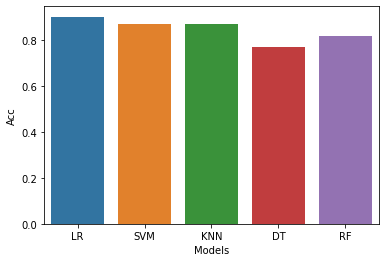

In [29]:
import seaborn as sns

sns.barplot(final_data['Models'], final_data['Acc'])

Prediction on New Data

In [46]:
data = pd.read_csv('heart.csv')

In [51]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [52]:
data = data.drop_duplicates()

In [53]:
x = data.drop('target', axis=1)
y = data['target']

In [55]:
log1 = LogisticRegression()

In [56]:
log1.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
newdata = pd.read_csv('newdata.csv')

In [58]:
newdata

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   54    1   0       125   212    0        1      168      0        1      2   

   ca  thal  
0   2     3

In [59]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[302 rows x 14 columns]

In [60]:
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[302 rows x 13 columns]

In [61]:
log1.predict(newdata)

array([0])

In [63]:
temp = log1.predict(newdata)
if temp[0]==0:
  print("Absence of Heart Disease")
else:
  print("Presence of Heart Disease")

Absence of Heart Disease
